<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from plotly import tools
import plotly.graph_objs as go
import kaleido

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [8]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', on_bad_lines='skip', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [9]:
display(hh_df.head())
display(hh_df.tail())
print(hh_df.shape)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


(44744, 12)


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [10]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [11]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [12]:
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(lambda x: re.split(r' образование', x)[0])

hh_df.drop(columns='Образование и ВУЗ', inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [13]:
from locale import normalize


hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x.split(' , ')[0][0]).astype('category')

hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: np.int8(x.split(' , ')[1][1:3]))

hh_df.drop(columns='Пол, возраст', inplace=True)

print(f'Процент женских резюме составляет {round((hh_df["Пол"].value_counts(normalize=True)[1]) * 100, 2)}')
print(f'Средний возраст соискателей равен {round(hh_df["Возраст"].mean(),2)}')

Процент женских резюме составляет 19.07
Средний возраст соискателей равен 32.19


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [14]:
hh_df['Опыт работы'].replace(['Не указано', np.nan], None, inplace=True)


def get_months(x):
    if x is None:
        return None
    sequence = x.split(' ')
    sequence = sequence[2:sequence.index('')]
    if len(sequence) == 2:
        return 12 * np.int8(sequence[0]) if ('год' in sequence[1]) or (sequence[1] == 'лет') else np.int8(sequence[0])
    return np.int16(12 * np.int8(sequence[0]) + np.int8(sequence[2]))


hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(lambda x: get_months(x))
hh_df.drop(columns=['Опыт работы'], inplace=True)

год года лет
месяц месяца месяцев 

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [15]:
# Функция для извлечения города
def get_city(x):
    city = x.split(' ,')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 
                      'Пермь', 'Воронеж', 'Волгоград' ]
    if city[0] == 'Москва':
        return 'Москва'
    if city[0] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    if city[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
    
# Функция для извлечения согласия на переезд
def get_ready_to_move(x):
    if ('не готов к переезду' in x) or ('не готова к переезду' in x):
        return False
    else:
        return True


# Функция для извлечения согласия на командировку
def get_ready_to_travel(x):
    if 'командировка' in x:
        if ('не готов к командировкам' in x) or ('не готова к командировкам' in x):
            return False
        else:
            return True
    return False


# Преобразования над данными
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(lambda x: get_ready_to_move(x))
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(lambda x: get_city(x))
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(lambda x: get_ready_to_travel(x))
hh_df.drop(columns='Город, переезд, командировки', inplace=True)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [16]:
employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
work_schedule_list = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

for employment, schedule in zip(employment_list, work_schedule_list):
    hh_df[employment] = hh_df['Занятость'].apply(lambda x: employment in x)
    hh_df[schedule] = hh_df['График'].apply(lambda x: schedule in x)

hh_df.drop(columns=['Занятость', 'График'], inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [18]:
exchange_rates = pd.read_csv('data/ExchangeRates.csv')
exchange_rates = exchange_rates[['currency', 'date', 'proportion', 'close']]
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date

hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date
hh_df['зп'] = hh_df['ЗП'].apply(lambda x: int(re.findall(r'\d{1,}', x)[0]))

hh_df['наименование валюты'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[1])
currencies = list(hh_df['наименование валюты'].unique())
iso_currencies = ['RUB', 'BYN', 'KZT', 'EUR', 'USD', 'UAH', 'UZS', 'KGS', 'AZN']
hh_df['наименование валюты'].replace(currencies, iso_currencies, inplace=True)

merged = hh_df.merge(exchange_rates,
            left_on=['наименование валюты','Обновление резюме'],
            right_on=['currency','date'],
            how='left')

merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh_df['ЗП (руб)'] = (merged['зп'] * merged['close']) / merged['proportion']
hh_df.drop(columns=['зп', 'наименование валюты'], inplace=True)

print(f'Медианное значение желаемой заработной платы соискателей: {round(hh_df["ЗП (руб)"].median())}')

Медианное значение желаемой заработной платы соискателей: 59019


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



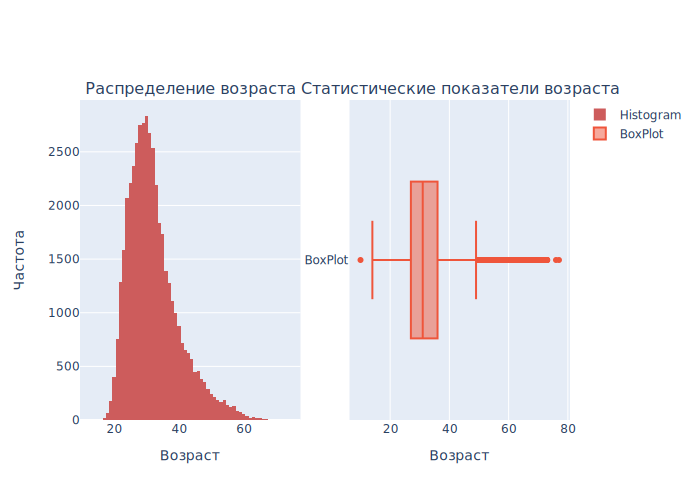

In [19]:
age_hist = go.Histogram(x=hh_df['Возраст'],
                        marker=dict(color="indianred"),
                        name='Histogram'
)

age_boxplot = go.Box(
    x=hh_df['Возраст'],
    name='BoxPlot'
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=("Распределение возраста","Статистические показатели возраста"))
fig.append_trace(age_hist, 1, 1)
fig.append_trace(age_boxplot, 1, 2)
fig.update_xaxes(title_text="Возраст", row=1, col=1)
fig.update_yaxes(title_text="Частота", row=1, col=1)
fig.update_xaxes(title_text="Возраст", row=1, col=2)
fig.show('svg')

#### Выводы по графику

1) Мода распределения равна 30 годам
2) Предельные значения (маскимальные выбросы) равны 10 годам и 77 годам
3) Возраст большинства соискателей находится в диапазоне от 27 лет до 36 лет
4) Согласно статья на hh.ru трудовой договор могут заключать лица, достигшие 14 лет. Более того с 14-16 лет необходимо предоставить писменное заключение от органов опеки, поэтому минимальное значение - 10 лет является выбросом. Пенсионный возраст в России для мужчин - 65 лет, для женщин - 60 лет, поэтому значения за доверительным интервалом больше 65 тоже можно считать выбросами.
4) При использовании функции skew() число получилось положительным, следователь распределение имеет правостороннюю асимметрию

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



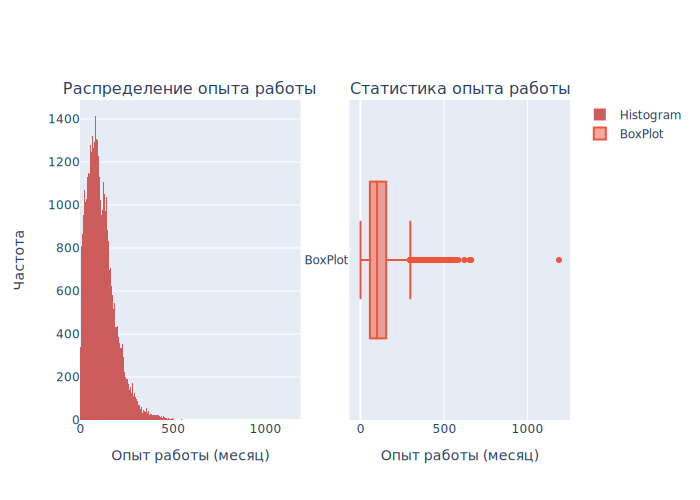

In [20]:
work_experience_hist = go.Histogram(x=hh_df['Опыт работы (месяц)'],
                        marker=dict(color="indianred"),
                        name='Histogram'
                        
)

work_experience_boxplot = go.Box(
    x=hh_df['Опыт работы (месяц)'],
    name='BoxPlot'
)

fig2 = tools.make_subplots(rows=1, cols=2, subplot_titles=("Распределение опыта работы",
                                                          "Статистика опыта работы"))
fig2.append_trace(work_experience_hist, 1, 1)
fig2.append_trace(work_experience_boxplot, 1, 2)
fig2.update_xaxes(title_text="Опыт работы (месяц)", row=1, col=1)
fig2.update_yaxes(title_text="Частота", row=1, col=1)
fig2.update_xaxes(title_text="Опыт работы (месяц)", row=1, col=2)
fig2.show('svg')

#### Выводы по графикам

1) Мода распределения равна 81 месяцу
2) Предельные значения равны 1 и 1188, что определенно является выбросом
3) У большинства соискателей опыт работы находится примерно в диапазоне от 57 до 154 месяцев
4) Если предположить, что человек работал всю жизнь с 16 лет до пенсионного возраста, его максимальный опыт может быть 588 месяцев, с учетом жизненных обстоятельств, возьмем максимальный опыт работы в 540 месяцев. Все, что больше 540 месяцев является выбросами

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


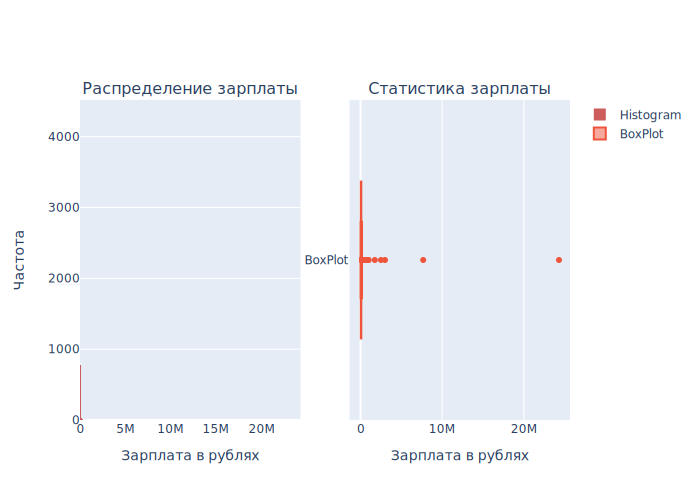

In [21]:
salary_hist = go.Histogram(x=hh_df['ЗП (руб)'],
                        marker=dict(color="indianred"),
                        name='Histogram'
                        
)

salary_boxplot = go.Box(
    x=hh_df['ЗП (руб)'],
    name='BoxPlot'
)

fig3 = tools.make_subplots(rows=1, cols=2, subplot_titles=("Распределение зарплаты",
                                                          "Статистика зарплаты"))
fig3.append_trace(salary_hist, 1, 1)
fig3.append_trace(salary_boxplot, 1, 2)
fig3.update_xaxes(title_text="Зарплата в рублях", row=1, col=1)
fig3.update_yaxes(title_text="Частота", row=1, col=1)
fig3.update_xaxes(title_text="Зарплата в рублях", row=1, col=2)
fig3.show('svg')

#### Выводы по графикам

1. Мода распределения равна 50 тыс. руб.
2. Предельные значения 1 руб. и 24.30488 м. руб.
3. Наиболее часто запрашиваемая заработная плата находится в диапазоне (37.082; 95.000) 
4. 1. Все значения свыше 500 тысяч рублей можно считать выбросами.
   2. Так как минимальная заработная плата в России 15279 руб., то надо проверить какой график работы выбирает соискатель. Так как в списке графиков присутствует волонтерство, минимальную заработную плату можно указать в 1000 рублей, предварительно удляить выбросы, где график работы "полная занятость", а заработная плата ниже 15279


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

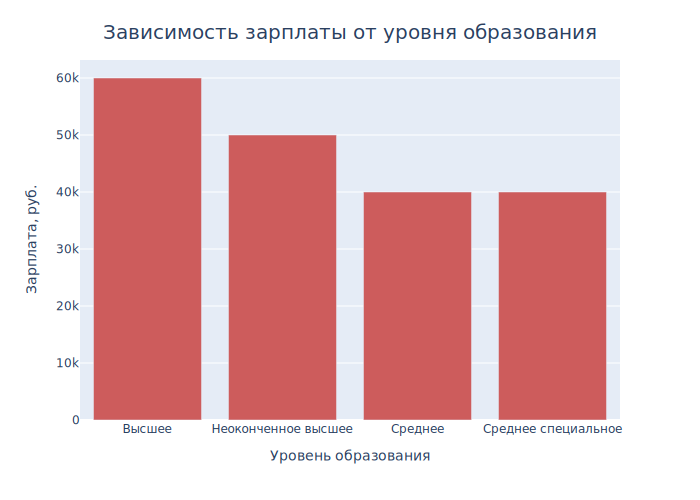

In [22]:
mask1 = hh_df['ЗП (руб)'] < 1000000
education_df = hh_df[mask1].groupby('Образование', as_index=False)['ЗП (руб)'].median()

education_barplot = px.bar(
    data_frame=education_df,
    x='Образование',
    y='ЗП (руб)',
    color_discrete_sequence=['indianred']
)

education_barplot.update_layout(
    title=dict(
        text='Зависимость зарплаты от уровня образования',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans',
    xaxis_title='Уровень образования',
    yaxis_title='Зарплата, руб.'
)

education_barplot.show('svg')


1. Наибольшее медианное значение зарплаты у специалистов с высшим образованием, когда наименьшее медианной значение зарплаты делят между собой специалисты со средним и срелним специальным уровнями образования. 
2. Разница между уровнями образования составляет 10 тысяч рублей. Так как медианной значение без разреза на уровни образования составляет 60 тысяч рублей, 10 тысяч составляют 16% и являются значительной разницей. Поэтому уровень образования является важым признаком для определения заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

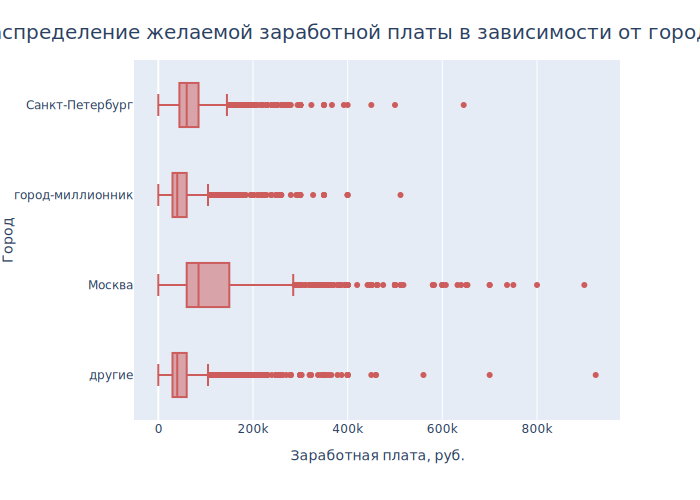

In [23]:
mask1 = hh_df['ЗП (руб)'] < 1000000

city_boxplot = px.box(
    data_frame=hh_df[mask1],
    x='ЗП (руб)',
    y='Город',
    color_discrete_sequence=['indianred']
)

city_boxplot.update_layout(
    title=dict(
        text='Распределение желаемой заработной платы в зависимости от города',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans',
    xaxis_title='Заработная плата, руб.'
)

city_boxplot.show('svg')

#### Описание графика

1. В Москве, так как это столица и город с населением в 11 миллионов человек, медианное значение самое высокое. 
    Размах в городе Москва тоже наибольший, более того, число потенциальных выбросов с высокой заработной платой тоже относится к городу Москва. 
2. На втором месте наибольшее медианное значение и размах в Санкт-Петербурге.
3. Удивительно то, что медианное значение и размах в городах-миллионниках такое же как и в оставшихся городах России.
Можно предположить, что Санкт-Петербург и Москва играют наибольшую роль относительно других городов в определении заработной платы, так как население в обоих городах превышает 4 миллиона, и ежегодно в Москву и культурную столицу переезжают жители с малых городв. Такой тренд увеличивает цену на жизнь в этих двух городах, заставляя людей желать более высокую заработную плату. 


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

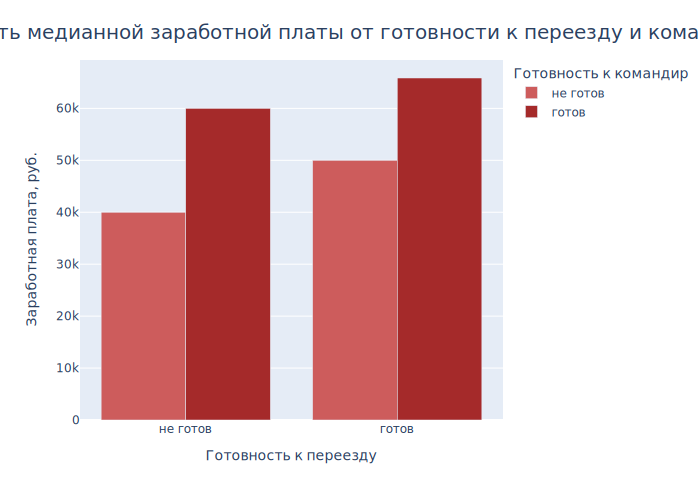

In [24]:
trip_df = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
trip_df['Готовность к командировкам'].replace([True, False], ['готов', 'не готов'], inplace=True)
trip_df['Готовность к переезду'].replace([True, False], ['готов', 'не готов'], inplace=True)


trip_barplot = px.bar(
    data_frame=trip_df,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',
    labels={
        'ЗП (руб)':'Заработная плата, руб.'
    },
    color_discrete_map={
                'не готов': "indianred",
                'готов': "brown"
                }
)

trip_barplot.update_layout(
    title=dict(
        text='Зависимость медианной заработной платы от готовности к переезду и командировкам',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans',
)

trip_barplot.show('svg')

#### Выводы по граифку

1. И готовность к переезду, и готовность к командировкам повышают заработную плату. Например, готовность к командировкам повышает заработную плату почти на 30%. 
2. Тем временем готовность к переезду играет меньшую роль и от силы повышает зарплату на 20%

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

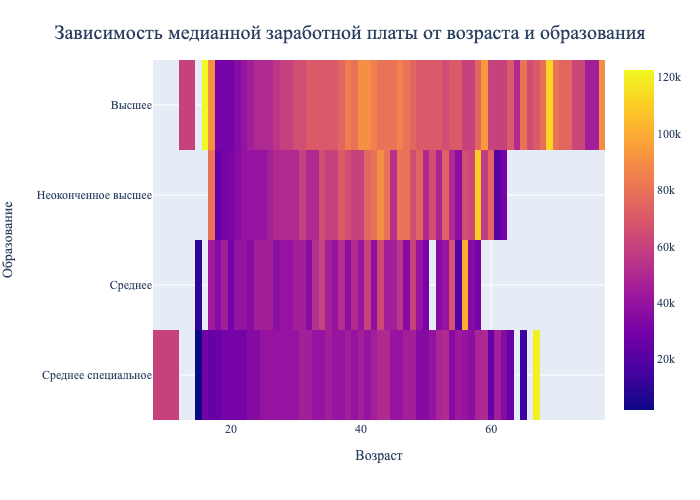

In [25]:
pivot_df = hh_df.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median'
)

pivot_heatmap = px.imshow(pivot_df)

pivot_heatmap.update_layout(
    title=dict(
        text='Зависимость медианной заработной платы от возраста и образования',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans',
)

pivot_heatmap.show('png')

#### Выводы по тепловой карте

1. На тепловой карте видно, что почти весь возрастной диапазон ищущих работу со средним специальным образованием указал желаемую заработанную плату не выше 50 тысяч рублей. На карте виден выброс: 67 лет 120 тысяч. Также заработная плата не сильно меняется с возрастом, что говорит о низком карьерном росте.
3. Как и ожидалось, диапазон зарплаты для людей с высшим образованием начинается с 50 тыся рублей, наиболее высокую зарплату запрашивают люди от 30 до 50 лет. 
4. С неоконченным высшим образованием сложно наблюдать зависимость, в возрастном диапазоне от 30 до 60 наблюдаются зарплаты от 20 тысяч до 110 тысяч рублей. 

Тенденции:
1. С возрастом люди просят зарплату выше.
2. Люди с высшим образованием имеют более высокие требования к зарплате, чем люди со средним специальным.
3. Для специалистов с высшим образованием наблюдается самый быстрый карьерный рост.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

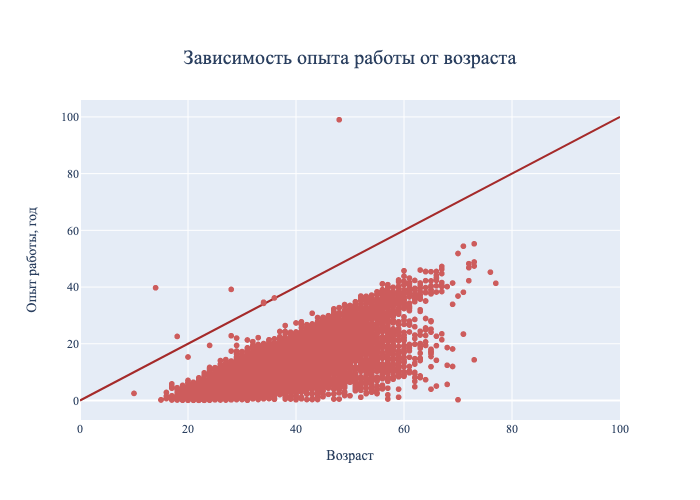

In [28]:
hh_df_copy = hh_df.copy()
hh_df_copy['Опыт работы (год)'] = hh_df_copy['Опыт работы (месяц)'].apply(lambda x: x / 12)

scatter = px.scatter(
    data_frame=hh_df_copy,
    x='Возраст',
    y='Опыт работы (год)',
    color_discrete_sequence=['indianred']
)

line = px.line(
    x=[0,100],
    y=[0,100],
    color_discrete_sequence=['brown']
)

fig = go.Figure(data=scatter.data + line.data)
fig.update_xaxes(title_text="Возраст")
fig.update_yaxes(title_text="Опыт работы, год")

fig.update_layout(
    title=dict(
        text='Зависимость опыта работы от возраста',
        x=0.5,
        y=0.90,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans',
)


fig.show('png')

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


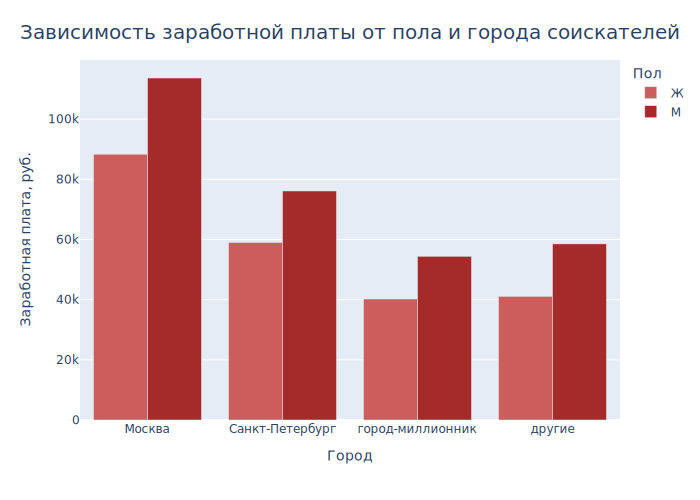

In [29]:
from turtle import title


gender_df = hh_df.groupby(['Пол', 'Город'], as_index=False)['ЗП (руб)'].mean()

gender_bar = px.bar(
    data_frame=gender_df,
    x='Город',
    y='ЗП (руб)',
    color='Пол',
    barmode='group',
    labels={
        'ЗП (руб)':'Заработная плата, руб.'
    },
    color_discrete_map={
                'Ж': "indianred",
                'М': "brown"
                }
)

gender_bar.update_layout(
    title=dict(
        text='Зависимость заработной платы от пола и города соискателей',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans'
)

gender_bar.show('svg')

### Выводы по графику

- На графике видно, что во всех городах средняя желаемая заработная плата мужчин почти в полтора раза выше, чем у женщин.
- При этом наибольшая разница видна в "других" городах России.
- Разница в желаемой заработной плате между мужчинам и женщинами в городах Москва и Санкт-Петербург наименьшая.

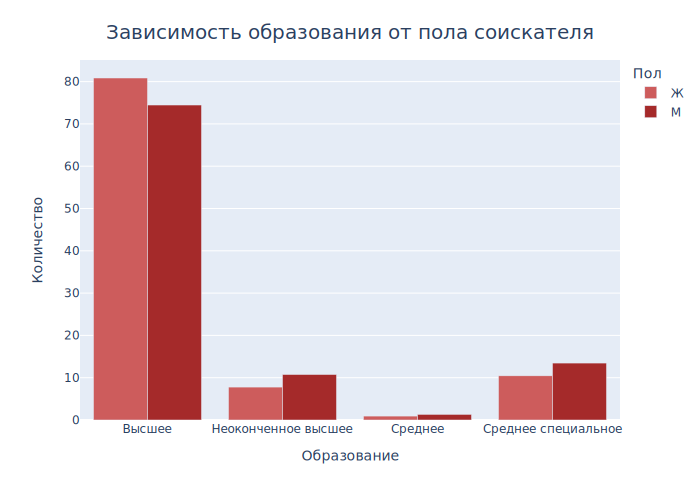

In [30]:
gender_education_df = hh_df.groupby(['Пол', 'Образование'], as_index=False)['Возраст'].count()


def get_percent(x):
    if x['Пол'] == 'Ж':
        return (x['Возраст'] / 8533) * 100
    elif x['Пол'] == 'М':
        return (x['Возраст'] / 36211) * 100


gender_education_df['Количество'] = gender_education_df.apply(lambda x: get_percent(x), axis=1)

gender_education_bar = px.bar(
    data_frame=gender_education_df,
    x='Образование',
    y='Количество',
    color='Пол',
    barmode='group',
    color_discrete_map={
                'Ж': "indianred",
                'М': "brown"
                }
)


gender_education_bar.update_layout(
    title=dict(
        text='Зависимость образования от пола соискателя',
        x=0.5,
        y=0.95,
        font=dict(
            size=20
        )
    ),
    font_family='Open Sans'
)

gender_education_bar.show('svg')

#### Выводы по граифку

Процент девушек с высшим образованием выше, также процент соискателей женского пола с неоконченным высшим, средним и средним специальным ниже. Тем не менее, как вы выяснилось из предыдущего графика, соискатели мужского пола в среднем запрашивают зарплату выше. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [31]:
hh_df.drop_duplicates(inplace=True)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [32]:
hh_df.isnull().sum()

ЗП                                   0
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Готовность к переезду                0
Город                                0
Готовность к командировкам           0
полная занятость                     0
полный день                          0
частичная занятость                  0
сменный график                       0
проектная работа                     0
гибкий график                        0
волонтерство                         0
удалённая работа                     0
стажировка                           0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
columns = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
hh_df.dropna(subset=columns, axis=0, inplace=True)
hh_df['Опыт работы (месяц)'].fillna(hh_df['Опыт работы (месяц)'].median(), inplace=True)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
outliers = hh_df[(hh_df['ЗП (руб)'] > 1e6) | (hh_df['ЗП (руб)'] < 1e3)]
hh_df = hh_df.drop(outliers.index)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'].apply(lambda x: x / 12)
outliers2 = hh_df[hh_df['Опыт работы (год)'] >= hh_df['Возраст']]
hh_df = hh_df.drop(outliers2.index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Text(0.5, 1.0, 'Распределение прологарифмированной величины "возраст"')

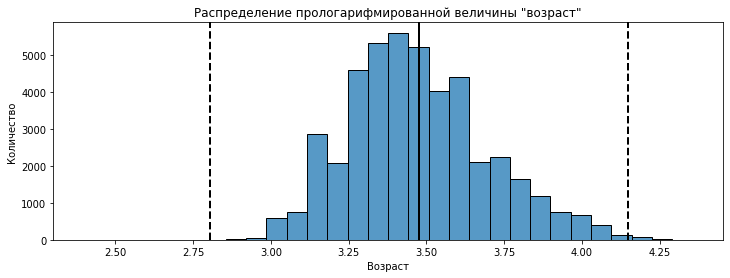

In [ ]:
fig = plt.figure(figsize=(12, 4))
log_age = np.log(hh_df['Возраст'] + 1)
log_age = log_age.astype(np.float32)
age_histplot = sns.histplot(log_age, bins=30)
age_histplot.axvline(log_age.mean(), color='k', lw=2)
age_histplot.axvline(log_age.mean() - 3*log_age.std(), color='k', ls='--', lw=2)
age_histplot.axvline(log_age.mean() + 3*log_age.std(), color='k', ls='--', lw=2)
age_histplot.set_ylabel('Количество')
age_histplot.set_title('Распределение прологарифмированной величины "возраст"')

In [ ]:
def outliers_z_score(data, feature, left=3, right=3, log_data=False):
    
    if log_data:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    
    x = x.astype(np.float32)
    x_mean = x.mean()
    x_std = x.std()
    
    lower_bound = x_mean - left * x_std
    upper_bound = x_mean + right * x_std
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    data = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, data

outliers, hh_df = outliers_z_score(hh_df, 'Возраст', right=4, log_data=True)

In [ ]:
display(outliers)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,сменный график,проектная работа,гибкий график,волонтерство,удалённая работа,стажировка,вахтовый метод,ЗП (руб),Опыт работы (год)
31137,10000 руб.,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,...,True,True,False,True,False,False,False,False,10000.0,0.166667
32950,2000 руб.,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,...,False,False,False,False,False,False,False,False,2000.0,0.250000
33654,60000 руб.,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,10,30.0,...,True,False,True,True,False,False,True,False,60000.0,2.500000


#### Выводы

1. При использовании функции skew() результат получился положительным, следовательно распределение емеет правостороннюю ассиметрию.
2. Z оценка выдала 3 выброса, где значение возраста находится в диапазоне 10-15 лет. В этом есть логическое зерно, так как работать без согласия органов опеки можно только с 16 лет.